In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas,scikit-learn

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.5.4
matplotlib 3.1.0
pandas 1.0.4
sklearn 0.23.2


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import Image
%matplotlib inline

### Destek Vektör Makineleri ile Regresyon Hesabı

$$x_i \in \mathbb{R}^{p}$$

$$i=1,2,3..,n ,$$

$$ y \in \mathbb{R}^{n}$$

$$ \frac{1}{2}\beta^T \beta + \lambda \sum_{i=1}^{n}(\xi_{i} + \xi_{i}^*) $$

$$ y_i - \beta^{T}\phi(x_i) - b \leq \epsilon + \xi_i, $$

$$ \beta^{T}\phi(x_i) + b - y_i \leq \epsilon + \xi_i^*, $$

$$ \xi_{i}, \xi_{i}^* \geq 0, i=1,2, ...,n $$

- Tahmin edilen değer, gerçek değerleden en az $\epsilon$ uzakta olan örneklemler cezalandırılıyor.
- Bu örneklemler, tahminlerinin $\epsilon$ aralığına bağlı olarak altında mı yoksa üstünde mi olduğuna göre $\xi$ veya $\xi^*$ ile cezalandırılır. 

In [4]:
from sklearn.datasets import load_boston
boston = datasets.load_boston()

In [5]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data = boston['data'],
                     columns= boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df["Price"] = boston['target']

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
abs(df.corr())['Price'].sort_values(ascending=False)

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64

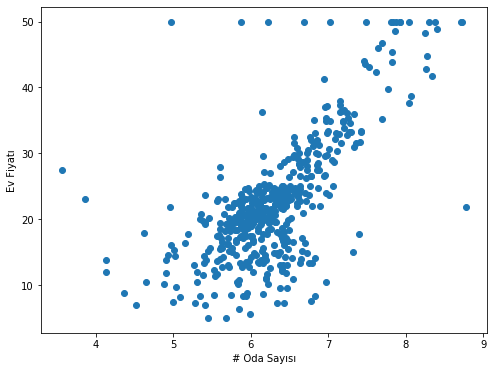

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['RM'], y=df['Price'])
plt.xlabel('# Oda Sayısı')
plt.ylabel('Ev Fiyatı')
plt.show()

In [12]:
X = np.array(df['RM']).reshape(-1,1)
#y = np.array(df['Price']).reshape(-1,1)
y = df.Price.values.ravel()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Doğrusal DV (Destek Vektör) Regresyon

In [14]:
from sklearn.svm import LinearSVR

In [15]:
eps=5
penalty = 0.01
svr = LinearSVR(C=penalty, epsilon=eps, fit_intercept=True)
svr.fit(X_train, y_train)

LinearSVR(C=0.01, epsilon=5)

In [16]:
print("C: {}".format(svr.C))
print("Epsilon: {}".format(svr.epsilon))

print("Intercept: {:,.3f}".format(svr.intercept_[0]))
print("Coefficient: {:,.3f}".format(svr.coef_[0]))

C: 0.01
Epsilon: 5
Intercept: 0.391
Coefficient: 3.199


### Regresyon Performansı Ölçme Yöntemleri

- Hesaplanan bir modelin başarısını ölçmek için farklı yöntemler vardır:
    - Ortalama Kare Hatası (Mean Square Error - MSE)
    - Kök Ortalama Kare Hatası (Root Mean Square Error - RMSE)
    - R2
    - Düzeltilmiş (Adjusted) R2

**Ortalama Kare Hatası (Mean Square Error)**

- Ortalama kare hatası, kalıntıların (**residual**--> Gerçek değer ile tahmin değeri arasındaki fark) kare toplamının örnek sayısına bölünmesi ile elde edilir.

$$ MSE = \frac{1}{n}\sum_{k=1}^{n} e_{k}^2 $$

**Kök Ortalama Kare Hatası**
- Modelin tahmin kabiliyetini ölçmek için kullanılan yaygın bir yöntemdir. MSE değerinin karekökünün alınmasıyla elde edilir.

$$ RMSE = \sqrt{\frac{1}{n}\sum_{k=1}^{n} e_{k}^2} $$

**R2**
- R2, bir modelde bağımlı değişkenin bağımsız değişkeni, ne oranda açıkladığını verir. R2 değeri 0 ile 1 arasında değerler alabilir. Elde edilen değer 1'e ne kadar yakınsa modelin uyumumun o derece iyi olduğu anlamına gelir.

$$ R^2 = 1 - \frac{RSS}{TSS} $$

Burada:

- RSS (Residual sum of squares): Artık değerlerin karelerinin toplamıdır.

- TSS (Total sum of squares): Ortalamaya uzaklığın karelerinin toplamıdır.

**Düzeltilmiş R2**:
- R2 değerinin olumsuz tarafı, bağımsız değişken sayısına olan duyarlılığıdır. Gerçek hayatta bağımlı değişkeni etkileyen birden fazla bağımsız değişken vardır. Bu durumda modele yeni değişkenler eklendikçe R2 değeri yükselmektedir. Bu dezavantajı ortadan kaldırmak için düzeltilmiş (adjusted) R2 değeri hesaplanır.

$$ Adj. R2 = 1 - \frac{RSS/(n-d-1)}{TSS/(n-1)} $$

Burada: 
- n, gözlem sayısı
- d, bağıntıdaki bağımsız değişken sayısı

In [17]:
yhat = svr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)

print("MSE = {:,.2f}".format(mse))
print("RMSE = {:,.2f}".format(rmse))
print("R2 = {:,.2f}".format(r2))

MSE = 55.90
RMSE = 7.48
R2 = 0.25


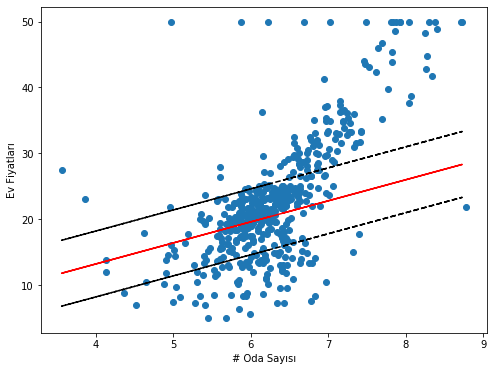

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['RM'], y=df['Price'])
plt.plot(X_test, yhat, color='red')
plt.plot(X_test, yhat+svr.epsilon, color='black', ls="--")
plt.plot(X_test, yhat-svr.epsilon, color='black', ls="--" )

plt.xlabel('# Oda Sayısı')
plt.ylabel('Ev Fiyatları')
plt.show()

### Model Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr =  LinearSVR(fit_intercept=True, max_iter=10000)

In [21]:
# k-katmanlı çapraz doğrulama: 5 katlı olsun
grid_svr = GridSearchCV(svr, grid, cv=5, scoring="neg_mean_squared_error")

In [22]:
grid_svr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_squared_error')

In [23]:
grid_svr.best_estimator_

LinearSVR(C=10.0, epsilon=0.8255102040816327, max_iter=10000)

In [24]:
best_grid_svr = grid_svr.best_estimator_
best_grid_svr.fit(X_train, y_train)

LinearSVR(C=10.0, epsilon=0.8255102040816327, max_iter=10000)

In [25]:
print("C: {}".format(best_grid_svr.C))
print("Epsilon: {}".format(best_grid_svr.epsilon))

print("Intercept: {:,.3f}".format(best_grid_svr.intercept_[0]))
print("Coefficient: {:,.3f}".format(best_grid_svr.coef_[0]))

mae = mean_squared_error(y_test, best_grid_svr.predict(X_test))
print("MAE = {:,.2f}".format(mae))

C: 10.0
Epsilon: 0.8255102040816327
Intercept: -31.844
Coefficient: 8.729
MAE = 40.83


In [26]:
yhat_for_best_est = best_grid_svr.predict(X_test)

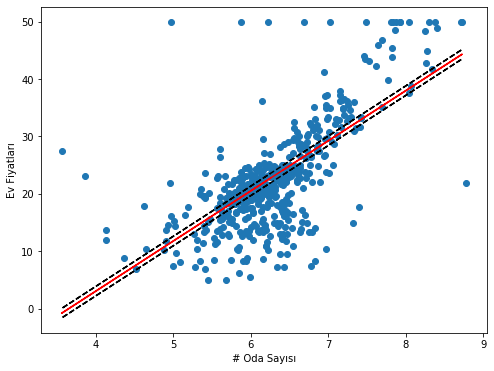

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['RM'], y=df['Price'])
plt.plot(X_test, yhat_for_best_est, color='red')
plt.plot(X_test, yhat_for_best_est+best_grid_svr.epsilon, color='black', ls="--")
plt.plot(X_test, yhat_for_best_est-best_grid_svr.epsilon, color='black', ls="--" )

plt.xlabel('# Oda Sayısı')
plt.ylabel('Ev Fiyatları')
plt.show()

In [28]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, best_grid_svr.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, best_grid_svr.predict(X_test)))
r2 = r2_score(y_test, best_grid_svr.predict(X_test))

print("MSE = {:,.2f}".format(mse))
print("RMSE = {:,.2f}".format(rmse))
print("R2 = {:,.2f}".format(r2))

MSE = 40.83
RMSE = 6.39
R2 = 0.45


- R2 değerimiz, Model tuning işleminden sonra biraz daha artmış olsada modelimizin uyumunun iyi olmadığı görülmektedir.

## Gözetimli Öğrenmede Model Değerlendirme Ölçütleri

- Gözetimli öğrenmede model performansını ölçmek için farklı yöntemler mevcuttur:
    - Doğruluk (Accuracy)
    - F1 Skoru (F1 Score)
    - Karmaşıklık Matrisi
    - ROC Eğrisi (ROC Curve - Receiver Operating Characteristic Curve)

**Doğruluk**
- Sınıflandırma problemlerinde doğru tahminlerin bütün tahminlere oranıdır.

- Hedef değişken sınıflarının dengeli olarak dağıldığı durumlarda Doğruluk ölçütünü kullanmak tek başına yeterli olabilir. Eğer veri kümesinde bu denge mevcut değilse sadece doğruluk ölçtünün kullanılması problem yaratacaktır.

**Kesinlik (Precision)**
- Pozitif tahminde bulunan verilerin gerçekte hangi oranda pozitif olduğu sorusuna cevap verir.

**Yakalama (Recall) / Hassaslık (Sensitivity)**
- Gerçekte pozitif olanların ne kadarının doğru tahmin edildiğini ölçer. Diğer bir adı "Doğru Pozitif Oranı"dır.

**Belirlilik (Specifity)**
- Gerçekte negatif olanların ne kadarının doğru tahmin edildiğini ölçer. Diğer bir adı "Doğru Negatif Oranı"dır.

**F1-Skoru**
- Kesinlik ve yakalama tek başlarına anlamlı bir sonuç çıkarmamıza yetmeyebilir. Bu gibi durumlarda iki ölçütü beraber kullanarak daha yüksek doğrulukta sonuçlar alabiliriz.

**ROC Eğrisi**
- İlk olarak sinyal belirleme teorisinde kullanılan ROC daha sonra tıpta tanı testlerinin değerlendirilmesinde yoğun olarak kullanılmıştır. Son yıllarda ise makine öğrenimi araçlarının değerlendirilmesinde önemli bir yer edinmiştir.

- Bu eğrideki her nokta, belirli bir karar eşiğine karşılık gelen Hassaslık/belirlilik oranını ayrıca temsil etmektedir.

**Eğri Altında Kalan Alan (Area Under the Curve - AUC)**
- ROC eğrisi altında kalan alandır. Bu ölçüt bizlere birden fazla modeli karşılaştırma imkanı vermektedir.
- AUC değeri, 0 ile 1 arasında değer alır.
- Tamamen rassal bir sınıflandırıcının AUC değeri 0.5'dir. Seçtiğimiz algoritmanın AUC değeri 1'e ne kadar yakın ise o kadar doğru sınıflandırılmas yapıldığını gözlüyoruz.


**Karmaşıklık Matrisi**

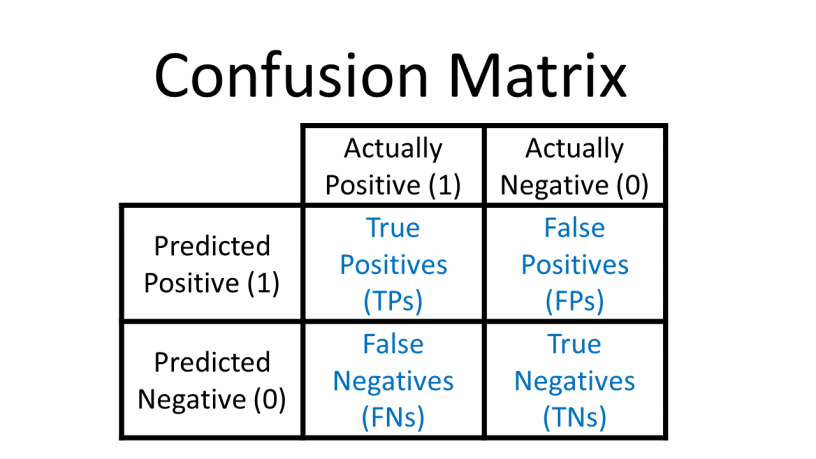

In [29]:
Image(filename='./confusion-matrix.png', width=700)

- Makine öğrenmesi alanında algoritmaların performansını ölçmek için kullanılan yaygın bir yöntemdir. İki veya daha fazla sınıf bilgisine sahip verilerin sınıflandırma probleminde kullanılır.

- Yukarıdaki grafik incelendiğinde sütunlar gerçek durumları gösterirken, satırlar ise tahminleri ifade etmektedir.

- Bir örnek üzerinden matrisi ele alırsak:
    - 0: Kişide hastalık bulunmamakta
    - 1: Kişide hastalık bulunmakta


- **Doğru Pozitif (DP, True Positive-TPs):** Verinin gerçek değerinin pozitif ve tahmin edilen değerinin de pozitif olduğu durumdur.

- **Doğru Negatif (DN, True Negative-TNs):** Verinin gerçek değerinin negatif ve tahmin edilen değerinin de negatif olduğu durumdur.

- **Yanlış Pozitif (YP, False Positive-FPs)** Verinin gerçek değerinin negatif fakat tahmin edilen değerinin pozitif oldığu durumdur.

- **Yanlış Negatif (YN, False Negative-FNs)** Verinin gerçek değerinin pozitif fakat tahmin edilen değerinin negatif olduğu bir durumdur.

$$ Doğruluk = \frac{(DP + DN)}{DP + DN + YP + YN} $$

$$ Kesinlik = \frac{DP}{DP + YP}$$

$$ Yakalama/Hassaslık = \frac{DP}{DP+YN} $$

$$ Belirlilik = \frac{DN}{DN + YP} $$

$$ F1-Skoru = \frac{2*Kesinlik*Yakalama}{Kesinlik + Yakalama} $$

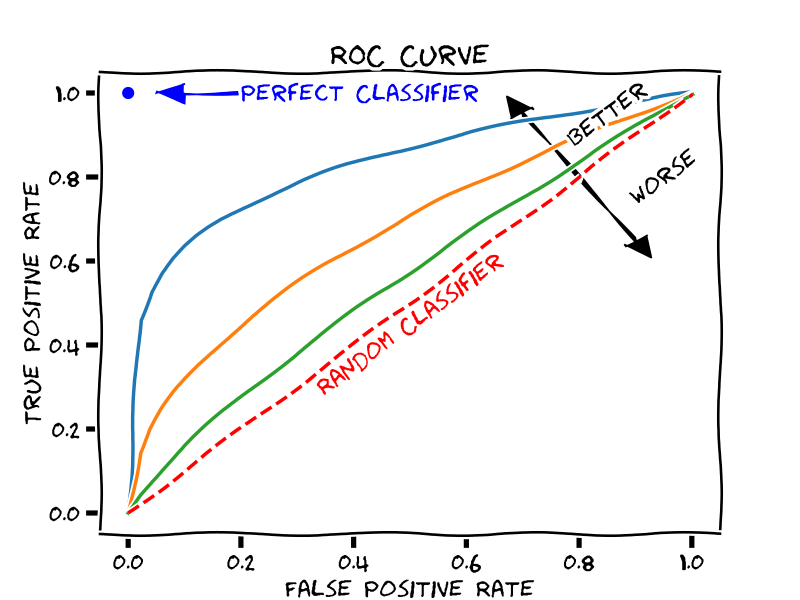

In [30]:
Image(filename='./roc.png', width=700)

### Sınıflandırma için Örnekler -1

In [31]:
from sklearn.datasets import load_wine
wine = datasets.load_wine()

In [32]:
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [33]:
df_wine = pd.DataFrame(data= wine['data'],
                     columns= wine['feature_names'])
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [34]:
df_wine["class_"] = wine["target"]

In [35]:
df_wine.sample(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0,0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,1
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0


In [36]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [37]:
#X = df_wine.iloc[:, 0:13].values
X = df_wine.drop(["class_"], axis=1)
y = df_wine.class_.values

In [38]:
print('Sınıf Bilgisi:', np.unique(y))

Sınıf Bilgisi: [0 1 2]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [40]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [41]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train_std, y_train)

SVC(random_state=42)

In [42]:
yhat = svm.predict(X_test_std)

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)

array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  1, 14]])

Confusion matrix, without normalization
Normalized confusion matrix


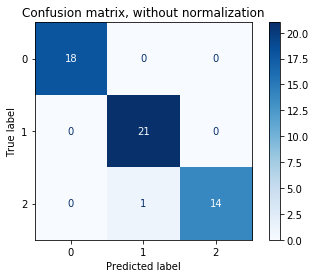

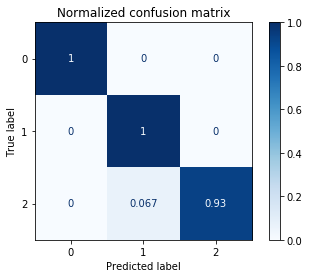

In [44]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm, X_test_std, y_test,
                                 display_labels=[0,1,2],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    #print(disp.confusion_matrix)


plt.show()


In [45]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        18
     class 1       0.95      1.00      0.98        21
     class 2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



auc: 1.00


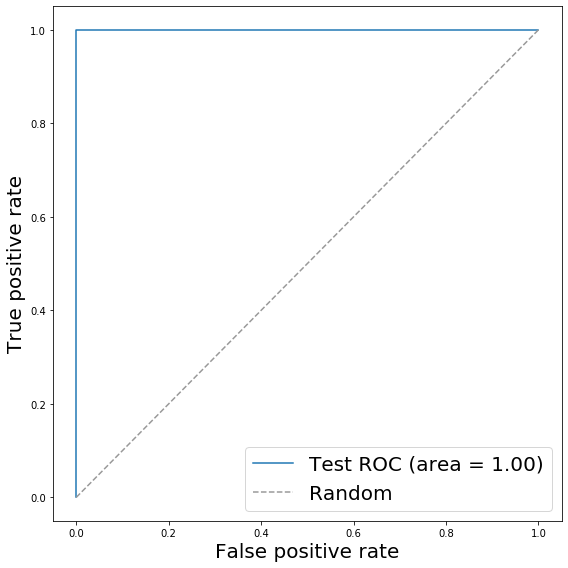

In [46]:
from sklearn.metrics import roc_curve, auc


svm = SVC(kernel="rbf", random_state=42, probability=True)
svm.fit(X_train_std, y_train)
#yhat = svm.predict(X_test)

fig = plt.figure(figsize=(8, 8))


"""#############################################################
### TRAINING ROC CURVE
train_probas = svm.fit(X_train_std,
                            y_train).predict_proba(X_train_std)

fpr, tpr, thresholds = roc_curve(y_train,
                                 train_probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,
         tpr,
         label='Train ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
"""

#############################################################
### TEST ROC CURVE
test_probas = svm.predict_proba(X_test_std)

fpr, tpr, thresholds = roc_curve(y_test,
                                 test_probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)
print("auc: {:,.2f}".format(roc_auc))

plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.legend(loc="lower right", fontsize=20)

plt.tight_layout()
plt.show()

### Sınıflandırma için Uygulamalar - 2

In [47]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


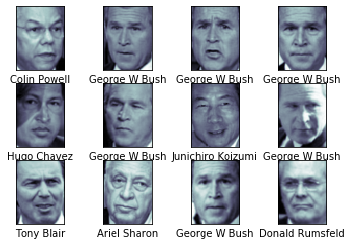

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 4)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="bone")
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])
plt.show()

In [49]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

In [50]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42, test_size=0.3)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

In [53]:
%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1min 43s, sys: 5.43 s, total: 1min 49s
Wall time: 47.4 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [54]:
model = grid.best_estimator_
yhat = model.predict(X_test)

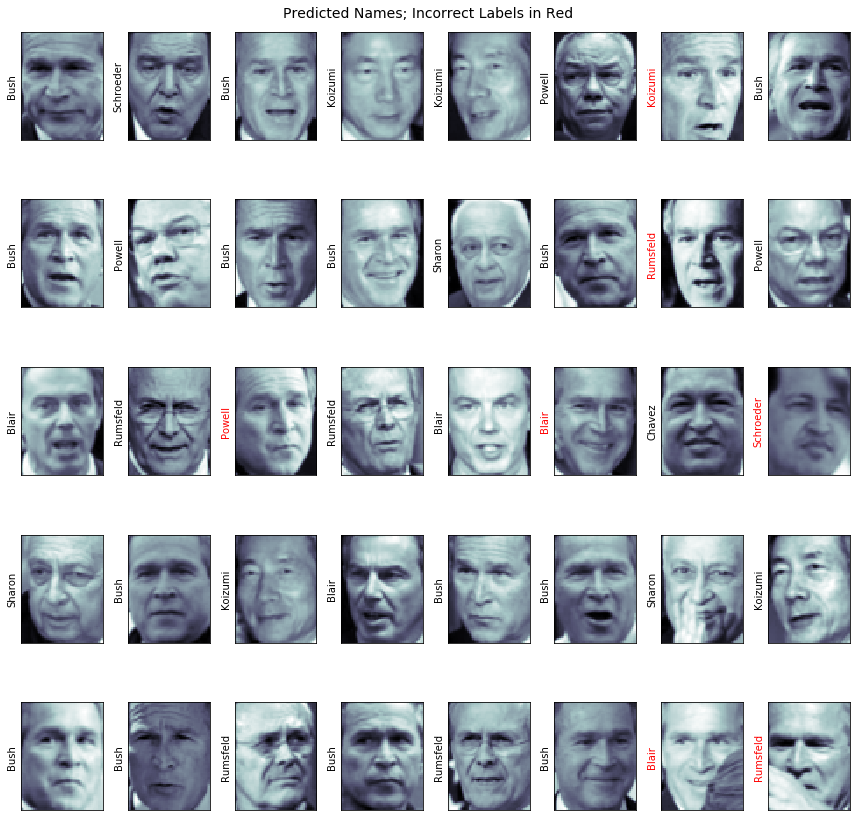

In [55]:
fig, ax = plt.subplots(5, 8, figsize=(12,12))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yhat[i]].split()[-1], color='black' if yhat[i] == y_test[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);
    
plt.tight_layout()    
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
print("Acc: ", accuracy_score(y_test, yhat))

Acc:  0.7975308641975308


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.88      0.77        17
     Colin Powell       0.80      0.86      0.83        84
  Donald Rumsfeld       0.67      0.89      0.76        36
    George W Bush       0.91      0.77      0.83       146
Gerhard Schroeder       0.70      0.75      0.72        28
      Hugo Chavez       0.89      0.63      0.74        27
Junichiro Koizumi       0.79      0.94      0.86        16
       Tony Blair       0.72      0.76      0.74        51

         accuracy                           0.80       405
        macro avg       0.77      0.81      0.78       405
     weighted avg       0.81      0.80      0.80       405



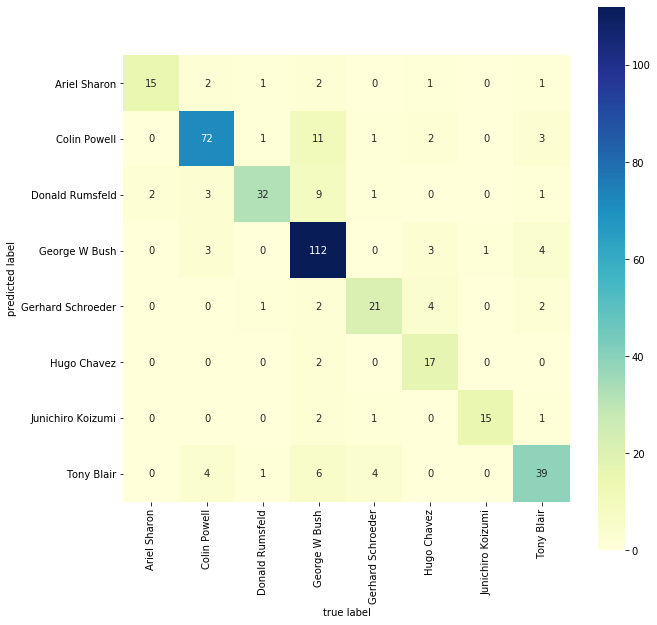

In [58]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(y_test, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True, xticklabels=faces.target_names, 
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Sınıflandırma için Uygulama-3

In [92]:
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

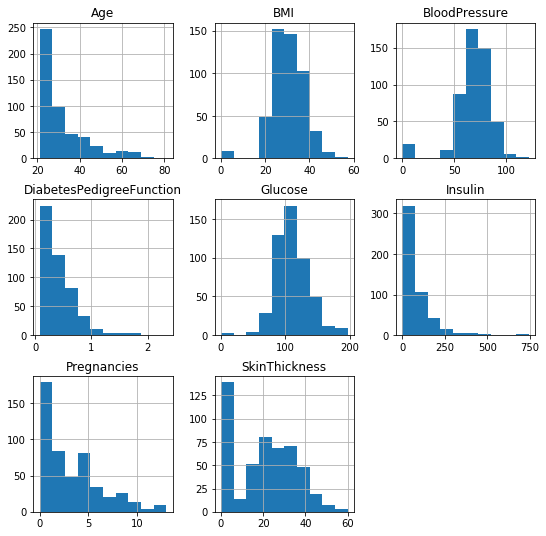

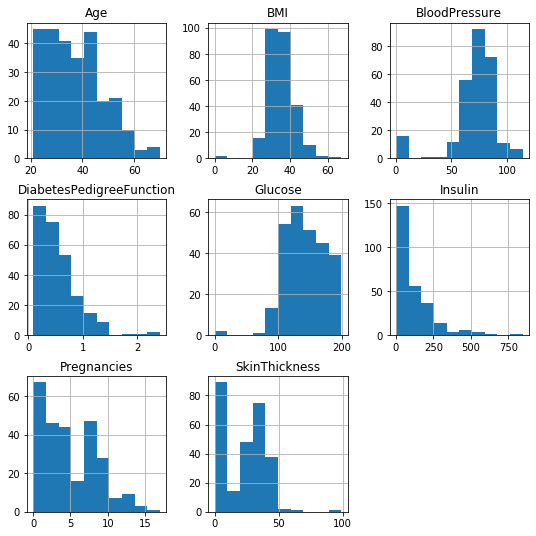

In [95]:
df.groupby("Outcome").hist(figsize=(9, 9))

In [96]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [98]:
svm = SVC(kernel="rbf").fit(X_train, y_train)

In [99]:
yhat = svm.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, classification_report
print("Eğitim Verisi için Doğruluk (Acc): {:.2f}".format(svm.score(X_train, y_train)))
print("Test Verisi için Doğruluk (Acc): {:.2f}".format(svm.score(X_test, y_test)))

Eğitim Verisi için Doğruluk (Acc): 0.78
Test Verisi için Doğruluk (Acc): 0.74


In [101]:
print("Test Verisi için Doğruluk (Acc): {:.2f}".format(accuracy_score(y_test, yhat)))

Test Verisi için Doğruluk (Acc): 0.74


In [102]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       150
           1       0.72      0.44      0.55        81

    accuracy                           0.74       231
   macro avg       0.74      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231



In [103]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)

array([[136,  14],
       [ 45,  36]])

In [104]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [105]:
svc = SVC(kernel="rbf")
svc.fit(X_train_std, y_train)
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_std, y_test)))

Accuracy on test set: 0.75


### Model Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

svm_grid = {"C": np.arange(1,5), "kernel":["linear", "rbf"]}
svm = SVC()
svm_grid_model = GridSearchCV(svm, svm_grid, cv=5, n_jobs=-1).fit(X_train_std, y_train)

In [74]:
svm_grid_model.best_score_

0.7801834544825199

In [75]:
svm_grid_model.best_params_

{'C': 4, 'kernel': 'linear'}

In [76]:
svm_last = SVC(C=4, kernel="linear").fit(X_train_std, y_train)

In [77]:
yhat = svm_last.predict(X_test_std)

In [78]:
print(accuracy_score(y_test, yhat))

0.7316017316017316


In [79]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80       150
           1       0.65      0.52      0.58        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



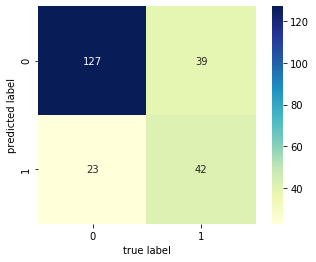

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Sınıflandırma için örnek-4

In [81]:
letterdata = pd.read_csv("./letterrecognition.csv")
letterdata.head()

,lettr,xbox,ybox,width,high,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xege,xegvy,yege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [82]:
letterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  xege    20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  yege    20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [83]:
X = letterdata.drop(["lettr"], axis=1)
y = letterdata["lettr"]

In [84]:
y.head()

0    T
1    I
2    D
3    N
4    G
Name: lettr, dtype: object

In [85]:
y = y.replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,
                        'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21, 'V':22, 'W':23,'X':24,'Y':25,'Z':26})

In [86]:
y.head()

0    20
1     9
2     4
3    14
4     7
Name: lettr, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
svm = SVC(kernel='linear', C=5.0, random_state=0).fit(X_train, y_train)

In [89]:
yhat = svm.predict(X_test)

In [90]:
print("SVM Linear Classifier - Test accuracy {:.2f}".format(accuracy_score(y_test, yhat)))

SVM Linear Classifier - Test accuracy 0.86


In [91]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.86      0.95      0.91       216
           2       0.86      0.87      0.86       239
           3       0.85      0.91      0.88       229
           4       0.80      0.90      0.85       248
           5       0.78      0.81      0.80       221
           6       0.86      0.86      0.86       246
           7       0.78      0.78      0.78       256
           8       0.67      0.74      0.70       202
           9       0.91      0.88      0.89       218
          10       0.91      0.87      0.89       233
          11       0.80      0.81      0.81       207
          12       0.91      0.87      0.89       231
          13       0.95      0.91      0.93       251
          14       0.91      0.94      0.93       223
          15       0.86      0.73      0.79       226
          16       0.95      0.87      0.91       249
          17       0.84      0.80      0.82       215
          18       0.78    

### Kaynaklar:

    - Deniz Kılınç, Nezahat Başeğmez, Uygulamalarla Veri Bilimi, Abaküs, 2018
    - Metin Bilgin, Makine Öğrenmesi, Papatya Bilim
    - Haldun Akpınar, DATA, Papatya Bilim
    - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
    - Jake VanderPlas, Python Data Science Handbook, 2017, O'Reilly Media
    - Sebastian Raschka ve Vahid Mirjalili, Python Machine Learning (3rd Ed.), Packt
    - A. Geron, "Hands-On Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques for Building Intelligent Systems", 2017, O'Reilly Media
    - S. İlker Birbil, Makine Öğrenmesi Ders Notları, 2018 (http://www.veridefteri.com/2018/12/13/tahmin-ve-cikarim-9-destek-vektor-makineleri/)
    - https://scikit-learn.org/stable/modules/svm.html#implementation-details
    - https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/
    - https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/800px-Roc-draft-xkcd-style.svg.png
    - https://archive.ics.uci.edu/ml/datasets/Letter+Recognition